In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
         #print(os.path.join(dirname, filename))
             pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
import cv2
dirs=[]
class_name=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    dirs.append(dirname)
    class_name.append(dirname.split('/')[-1])
dirs=dirs[3:]
class_name=class_name[3:]
dirs


['/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/dyed-lifted-polyps',
 '/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/normal-z-line',
 '/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/dyed-resection-margins',
 '/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/normal-pylorus',
 '/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/normal-cecum',
 '/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/polyps',
 '/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/ulcerative-colitis',
 '/kaggle/input/the-kvasir-dataset/kvasir-dataset-v2/esophagitis']

In [39]:
class_name

['dyed-lifted-polyps',
 'normal-z-line',
 'dyed-resection-margins',
 'normal-pylorus',
 'normal-cecum',
 'polyps',
 'ulcerative-colitis',
 'esophagitis']

# Construre x et y

In [40]:
i=0
y=[]
x=[]
for dirr in  dirs:
    for dirname, _, filenames in os.walk(dirr):
            for filename in filenames:
                img_array = cv2.imread(os.path.join(dirname, filename))
                ima_resize = cv2.resize(img_array, (224, 224))

                x.append(ima_resize)
                y.append(i)
    i=i+1
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(8000, 224, 224, 3)
(8000,)


In [49]:
y=y.reshape(1,-1)[0]

In [53]:
np.count_nonzero(y==)

1000

# Check data valance

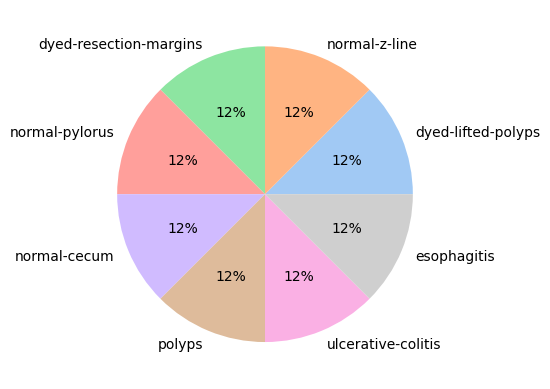

In [59]:
from matplotlib import pyplot as plt, cm  
import seaborn as sns

df = pd.DataFrame({
    'dataset': class_name,
    'nbr_of_img_class': [np.count_nonzero(y==0),np.count_nonzero(y==1),np.count_nonzero(y==2),np.count_nonzero(y==3), np.count_nonzero(y==4), np.count_nonzero(y==5), np.count_nonzero(y==6), np.count_nonzero(y==7)]})

color = sns.color_palette('pastel')
plt.pie(df['nbr_of_img_class'], labels = df.dataset, colors = color, autopct='%.0f%%')
plt.show()

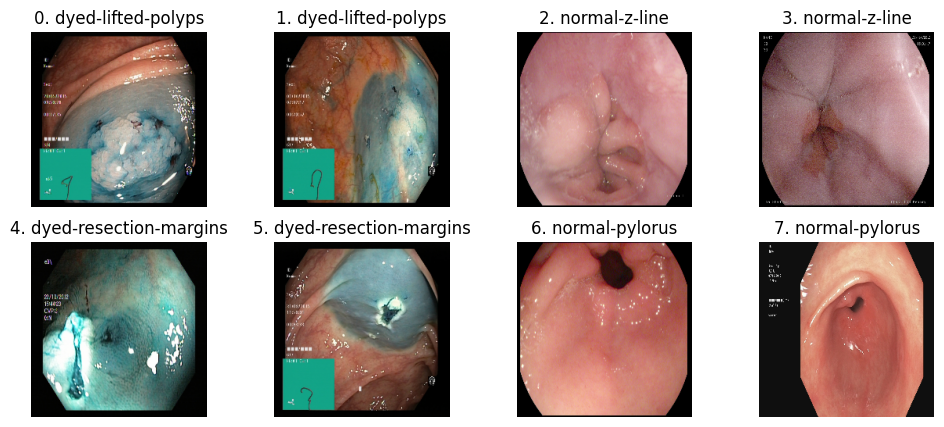

In [58]:
plt.figure(figsize=(12, 5))
st, end = 0, 500
for i in range(8):
    plt.subplot(2, 4, i + 1)
    idx = np.random.randint(st, end)
    st = end + 1
    end = (i + 2) * 500
    # plt.imshow(X[idx][:,:,::-1])
    plt.imshow(x[idx][:, :, ::-1])
    plt.title(f"{i}. {class_name[y[idx]]}")
    plt.axis("off")
plt.show()